In [1]:
# Import numpy and OpenCV
import numpy as np
import cv2

In [5]:
from vidstab import VidStab

# Using defaults
stabilizer = VidStab()
stabilizer.stabilize(input_path='car_test.mp4', output_path='car_test_out.avi', border_type='reflect')

ModuleNotFoundError: No module named 'vidstab'

In [ ]:
import cv2
from vidstab import VidStab, layer_overlay

# Initialize object tracker, stabilizer, and video reader
object_tracker = cv2.TrackerCSRT_create()
stabilizer = VidStab()
vidcap = cv2.VideoCapture("test_unstable.mp4")

# Initialize bounding box for drawing rectangle around tracked object
object_bounding_box = None

while True:
    grabbed_frame, frame = vidcap.read()

    # Pass frame to stabilizer even if frame is None
    stabilized_frame = stabilizer.stabilize_frame(input_frame=frame, border_size=50)

    # If stabilized_frame is None then there are no frames left to process
    if stabilized_frame is None:
        break

    # Draw rectangle around tracked object if tracking has started
    
    # Display stabilized output
    cv2.imshow('Frame', stabilized_frame)
vidcap.release()
cv2.destroyAllWindows()

In [ ]:
import cv2 as cv
import numpy as np
from vidstab import VidStab


def getOutputs(net):
    # Get the names of all the layers in the network
    layersNames = net.getLayerNames()
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]


def drawBox(classId, conf, left, top, right, bottom):
    # Draw a bounding box.
    cv.rectangle(frame, (left, top), (right, bottom), (255, 178, 50), 3)
    
    label = '%.2f' % conf
        
    # Get the label for the class name and its confidence
    if classes:
        assert(classId < len(classes))
        label = '%s:%s' % (classes[classId], label)

def postprocess(frame, outs):
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]

    #s the class with the highest score.
    classIds = [] 
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            classId = np.argmax(scores)
            confidence = scores[classId]
            if confidence > cnf_threshold:
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                classIds.append(classId)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])

    # Perform non maximum suppression to eliminate redundant overlapping boxes with
    # lower confidences.
    indices = cv.dnn.NMSBoxes(boxes, confidences, cnf_threshold, nms)
    for i in indices:
        i = i[0]
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        drawBox(classIds[i], confidences[i], left, top, left + width, top + height)

        
# Yolo
cnf_threshold = 0.5
nms = 0.4
width = 412
height = 412

#input
video = 'test_unstable.mp4'

# Class
classesFile = "yolo/coco.names"
classes = None

with open(classesFile, 'rt') as file:
    classes = file.read().rstrip('\n').split('\n')

configuration = "yolo/yolov3.cfg"
weights = "yolo/yolov3.weights"
net = cv.dnn.readNetFromDarknet(configuration, weights)

#Stabilizer
stabilizer = VidStab()
cap = cv.VideoCapture(video)
outputFile = video[:-4]+'_out_reflect.avi'

# Get the video writer initialized to save the output video
vid_writer = cv.VideoWriter(outputFile, cv.VideoWriter_fourcc('M','J','P','G'), 30, (round(cap.get(cv.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv.CAP_PROP_FRAME_HEIGHT))))
while cv.waitKey(1) < 0:
    
    # get frame from the video
    hasFrame, frame = cap.read()
    
    frame = stabilizer.stabilize_frame(input_frame=frame, border_size=50, border_type='reflect')
    
    # Stop the program if reached end of video
    if not hasFrame:
        cv.waitKey(3000)
        # Release device
        vid_writer.release()
        cap.release()
        break

    # Create a 4D blob from a frame.
    blob = cv.dnn.blobFromImage(frame, 1/255, (width, height), [0,0,0], 1, crop=False)

    # Sets the input to the network
    net.setInput(blob)

    # Runs the forward pass to get output of the output layers
    outs = net.forward(getOutputs(net))

    # Remove the bounding boxes with low confidence
    postprocess(frame, outs)

    # Put efficiency information. The function getPerfProfile returns the overall time for inference(t) and the timings for each of the layers(in layersTimes)
    t, _ = net.getPerfProfile()
    #label = 'Inference time: %.2f ms' % (t * 1000.0 / cv.getTickFrequency())
    #cv.putText(frame, label, (0, 15), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

    vid_writer.write(frame.astype(np.uint8))

    cv.imshow('Stabilized YOLO', frame)

AttributeError: 'cv2.VideoWriter' object has no attribute 'close'

In [ ]:
import cv2 as cv
import numpy
from vidstab import VidStab


def getOutputs(net):
    # Get the names of all the layers in the network
    layersNames = net.getLayerNames()
    # Get the names of the output layers, i.e. the layers with unconnected outputs
    return [layersNames[i[0] - 1] for i in net.getUnconnectedOutLayers()]


def drawBox(classId, conf, left, top, right, bottom):
    # Draw a bounding box.
    cv.rectangle(frame, (left, top), (right, bottom), (255, 178, 50), 3)
    
    label = '%.2f' % conf
        
    # Get the label for the class name and its confidence
    if classes:
        assert(classId < len(classes))
        label = '%s:%s' % (classes[classId], label)

def postprocess(frame, outs):
    frameHeight = frame.shape[0]
    frameWidth = frame.shape[1]

    #s the class with the highest score.
    classIds = [] 
    confidences = []
    boxes = []
    for out in outs:
        for detection in out:
            scores = detection[5:]
            classId = np.argmax(scores)
            confidence = scores[classId]
            if confidence > cnf_threshold:
                center_x = int(detection[0] * frameWidth)
                center_y = int(detection[1] * frameHeight)
                width = int(detection[2] * frameWidth)
                height = int(detection[3] * frameHeight)
                left = int(center_x - width / 2)
                top = int(center_y - height / 2)
                classIds.append(classId)
                confidences.append(float(confidence))
                boxes.append([left, top, width, height])

    # Perform non maximum suppression to eliminate redundant overlapping boxes with
    # lower confidences.
    indices = cv.dnn.NMSBoxes(boxes, confidences, cnf_threshold, nms)
    for i in indices:
        i = i[0]
        box = boxes[i]
        left = box[0]
        top = box[1]
        width = box[2]
        height = box[3]
        drawBox(classIds[i], confidences[i], left, top, left + width, top + height)

        
# Yolo
cnf_threshold = 0.5
nms = 0.4
width = 412
height = 412


# Open the ZED camera
cap = cv.VideoCapture(0)
if cap.isOpened() == 0:
    exit(-1)

# Set the video resolution to HD720 (2560*720)
cap.set(cv.CAP_PROP_FRAME_WIDTH, 2560)
cap.set(cv.CAP_PROP_FRAME_HEIGHT, 720)


#output video
#vid_writer = cv.VideoWriter(outputFile, cv.VideoWriter_fourcc('M','J','P','G'), 30, (round(cap.get(cv.CAP_PROP_FRAME_WIDTH)),round(cap.get(cv.CAP_PROP_FRAME_HEIGHT))))

while True :
    # Get a new frame from camera
    retval, frame = cap.read()
    # Extract left and right images from side-by-side
    left_right_image = numpy.split(frame, 2, axis=1)
    
    frame = stabilizer.stabilize_frame(input_frame=left_right_image[1], border_size=50)
    
    # Stop the program if reached end of video
    if not hasFrame:
        cv.waitKey(3000)
        # Release device
        #vid_writer.close()
        cap.release()
        break

    # Create a 4D blob from a frame.
    blob = cv.dnn.blobFromImage(frame, 1/255, (width, height), [0,0,0], 1, crop=False)

    # Sets the input to the network
    net.setInput(blob)

    # Runs the forward pass to get output of the output layers
    outs = net.forward(getOutputs(net))

    # Remove the bounding boxes with low confidence
    postprocess(frame, outs)

    # Put efficiency information. The function getPerfProfile returns the overall time for inference(t) and the timings for each of the layers(in layersTimes)
    t, _ = net.getPerfProfile()
    #label = 'Inference time: %.2f ms' % (t * 1000.0 / cv.getTickFrequency())
    #cv.putText(frame, label, (0, 15), cv.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255))

    #Output
    #vid_writer.write(frame.astype(np.uint8))

    cv.imshow('Stabilized YOLO', frame)
    
    
    if cv2.waitKey(30) >= 0 :
        break

exit(0)
                     

"\nfrom vidstab import VidStab\n\nstabilizer = VidStab()\nstabilizer.stabilize(input_path=0,\n                     output_path='stable_webcam.avi',\n                     max_frames=1000,\n                     playback=True)\n                     \n"

In [ ]:
#Combining videos

In [ ]:
import vedit
import logging
logging.basicConfig()
log = logging.getLogger()
log.setLevel( logging.DEBUG )

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('C:\\Users\\HP\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.font_manager:findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('C:\\Users\\HP\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf') with score of 0.050000.
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


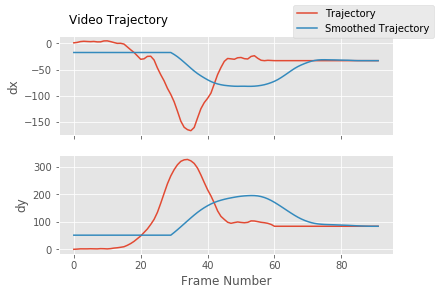

DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos
DEBUG:matplotlib.axes._base:update_title_pos


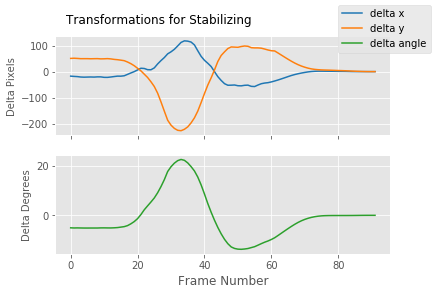

In [ ]:
from vidstab import VidStab
import matplotlib.pyplot as plt

stabilizer = VidStab()
stabilizer.stabilize(input_path='car_test.mp4', output_path='stable_video_car.avi')

stabilizer.plot_trajectory()
plt.show()

stabilizer.plot_transforms()
plt.show()

# Merging videos